[000]  dy_i = 28.75 * x + 12730.46    loss: 13556334812.110344
[001]  dy_i = 46.30 * x + 21159.43    loss: 8415728539.008591
[002]  dy_i = 57.19 * x + 25969.23    loss: 3041676414.3001556
[003]  dy_i = 64.40 * x + 29402.56    loss: 1597782828.7971754
[004]  dy_i = 68.56 * x + 31843.85    loss: 1530777335.1815228
[005]  dy_i = 73.05 * x + 34582.33    loss: 1768573863.8826962
[006]  dy_i = 74.69 * x + 35721.31    loss: 1062755076.4591731
[007]  dy_i = 80.81 * x + 36851.11    loss: 5096757996.299275
[008]  dy_i = 81.10 * x + 37176.76    loss: 1237916258.1870742
[009]  dy_i = 82.26 * x + 37937.93    loss: 707928602.377424
[010]  dy_i = 82.47 * x + 38034.81    loss: 1832135663.7836308
[011]  dy_i = 89.16 * x + 39310.03    loss: 4485475051.598969
[012]  dy_i = 91.99 * x + 38941.47    loss: 4465733737.292627
[013]  dy_i = 89.81 * x + 37934.37    loss: 1615120877.0968132
[014]  dy_i = 87.83 * x + 36970.77    loss: 768568330.0260246
[015]  dy_i = 86.04 * x + 35925.29    loss: 625604515.6836162


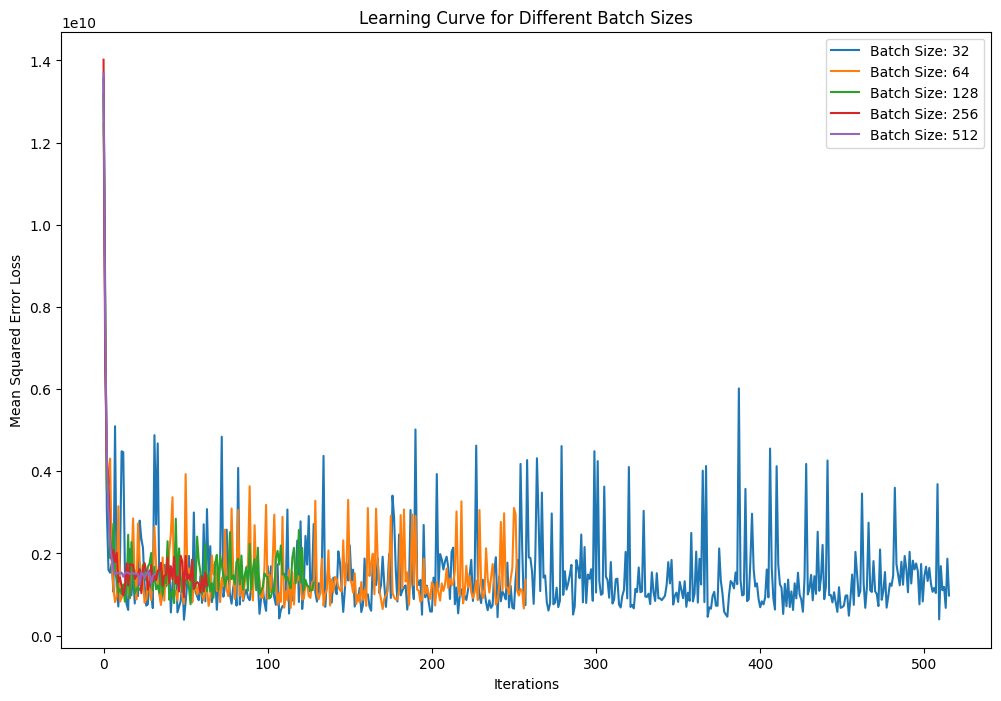

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the linear regression fit
def calculate_linear_regression(x, y):
    n = len(x)
    sum_xy = np.sum(x * y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x * x)

    denominator = n * sum_x2 - sum_x * sum_x

    m = (n * sum_xy - sum_x * sum_y) / denominator
    b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator

    return m, b

# Function to plot data and linear fit
def plot_data(x, y, m, b, plt=plt):
    plt.plot(x, y, 'bo')
    linear_x = np.arange(x.min(), x.max())
    linear_y = linear_x * m + b
    plt.plot(linear_x, linear_y, 'r-', label='fit')

# Function to perform stochastic gradient descent (SGD) update
def updated_m(x, y, m, b, learning_rate):
    return m - learning_rate * np.mean((m * x + b - y) * x)

def updated_b(x, y, m, b, learning_rate):
    return b - learning_rate * np.mean(m * x + b - y)

# Function to calculate mean squared error loss
def loss(x, y, m, b):
    return (m * x + b - y) ** 2

# Load dataset
data_url = 'https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv'
data = pd.read_csv(data_url)

# Define batch sizes
batch_sizes = [32, 64, 128, 256, 512]

# Initialize the figure for plotting
plt.figure(figsize=(12, 8))

# Iterate over different batch sizes
for batch_size in batch_sizes:
    # Initialize weights and bias
    m = 5.0
    b = 1000.0

    # Learning rates for slope and intercept
    learning_rate_m = 1e-7
    learning_rate_b = 1e-1

    # Number of iterations
    loop_N = 30 * len(data) // batch_size

    # Lists to store loss values for plotting
    loss_history = []

    for i in range(loop_N):
        # Sample a batch from the dataset
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()

        # Update slope and intercept based on the current values
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        # Calculate the mean squared error loss
        loss_value = np.mean(loss(data_x, data_y, m, b))

        # Keep a history of loss values
        loss_history.append(loss_value)

        # Print progress
        print(f'[{i:03d}]  dy_i = {m:.2f} * x + {b:.2f}    loss: {loss_value}')

    # Plot the learning curve for the current batch size
    plt.plot(range(loop_N), loss_history, label=f'Batch Size: {batch_size}')

# Add labels and legend
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error Loss')
plt.title('Learning Curve for Different Batch Sizes')
plt.legend()

# Show the plot
plt.show()